# Header files

In [1]:
import re
import os 
import json
# import requests

import numpy as np
import scipy as sc
import pandas as pd 
import networkx as nx 
import matplotlib.pyplot as plt

from itertools import compress
from collections import Counter
from scipy.interpolate import Rbf
from statsmodels.sandbox.stats.multicomp import fdrcorrection0

# File imports

In [2]:
all_datasets = ('Dataset1', 'Dataset2', 'Dataset3', 'Dataset4', 'Dataset5', 'Dataset6', 'Dataset7', 'Dataset8')

Node_name = ['ADFL','ADFR','ADLL','ADLR','AFDL','AFDR','ALML','ALMR','ALNL','ALNR','AQR','ASEL','ASER','ASGL','ASGR','ASHL','ASHR','ASIL','ASIR','ASJL','ASJR','ASKL','ASKR','AUAL','AUAR','AVM','AWAL','AWAR','AWBL','AWBR','AWCL','AWCR','BAGL','BAGR','DVA','FLPL','FLPR','IL2DL','IL2DR','IL2L','IL2R','IL2VL','IL2VR','OLLL','OLLR','OLQDL','OLQDR','OLQVL','OLQVR','PLNL','PLNR','SAADL','SAADR','SAAVL','SAAVR','SDQL','SDQR','URBL','URBR','URXL','URXR','URYDL','URYDR','URYVL','URYVR','ADAL','ADAR','AIAL','AIAR','AIBL','AIBR','AINL','AINR','AIYL','AIYR','AIZL','AIZR','AVAL','AVAR','AVBL',
             'AVBR','AVDL','AVDR','AVEL','AVER','AVJL','AVJR','BDUL','BDUR','PVCL','PVCR','PVPL','PVPR','PVR','PVT','RIAL','RIAR','RIBL','RIBR','RIFL','RIFR','RIGL','RIGR','RIH','RIML','RIMR','RIPL','RIPR','RIR','IL1DL','IL1DR','IL1L','IL1R','IL1VL','IL1VR','RIVL','RIVR','RMDDL','RMDDR','RMDL','RMDR','RMDVL','RMDVR','RMED','RMEL','RMER','RMEV','RMFL','RMFR','RMHL','RMHR','SIADL','SIADR','SIAVL','SIAVR','SIBDL','SIBDR','SIBVL','SIBVR','SMBDL','SMBDR','SMBVL','SMBVR','SMDDL','SMDDR','SMDVL','SMDVR','URADL','URADR','URAVL','URAVR','ADEL','ADER','AIML','AIMR','ALA','AVFL','AVFR','AVHL',
             'AVHR','AVKL','AVKR','AVL','CEPDL','CEPDR','CEPVL','CEPVR','DVC','HSNL','HSNR','PVNL','PVNR','PVQL','PVQR','RICL','RICR','RID','RIS','RMGL','RMGR','BWM-DL01','BWM-DR01','BWM-VL01','BWM-VR01','BWM-DL02','BWM-DR02','BWM-VL02','BWM-VR02','BWM-DL03','BWM-DR03','BWM-VL03','BWM-VR03','BWM-DL04','BWM-DR04','BWM-VL04','BWM-VR04','BWM-DL05','BWM-DR05','BWM-VL05','BWM-VR05','BWM-DL06','BWM-DR06','BWM-VL06','BWM-VR06','BWM-DL07','BWM-DR07','BWM-VL07','BWM-VR07','BWM-DL08','BWM-DR08','BWM-VL08','BWM-VR08','CANL','CANR','CEPshDL','CEPshDR','CEPshVL','CEPshVR','GLRDL','GLRDR','GLRL','GLRR','GLRVL','GLRVR']

Post_emb = ['ALNL','ALNR','AQR','AVM','PLNL','PLNR','SDQL','SDQR','RMFL','RMFR','RMHL','RMHR','AVFL','AVFR','HSNL','HSNR','PVNL','PVNR']

timepoint = {
    'Dataset1': 0,
    'Dataset2': 5,
    'Dataset3': 8,
    'Dataset4': 16,
    'Dataset5': 23,
    'Dataset6': 27,
    'Dataset7': 50,
    'Dataset8': 50,
}

stage = {   
    'Dataset1': 'L1',
    'Dataset2': 'L1',
    'Dataset3': 'L1',
    'Dataset4': 'L1',
    'Dataset5': 'L2',
    'Dataset6': 'L3',
    'Dataset7': 'Adult',
    'Dataset8': 'Adult'
}

larval_stage_ends = [0, 16, 25, 34, 45]
larval_stage_mids = [8, 20.5, 29.5, 39.5, 50]
larval_stage_labels = ['L1', 'L2', 'L3', 'L4', '  Adult']

categories = {
    'increase': 'Developmental change',
    'decrease': 'Developmental change',
    'stable': 'Stable',
    'noise': 'Variable',
    'remainder': 'Variable'
}

In [69]:
def nclass(n):
    if n in (
        'AVG', 'DVC', 'PVR', 'PVT', 'RIH', 'RIR', 'DVA', 'AQR', 'AVM', 'PQR',
        'PVM', 'DVB', 'PDA', 'PDB', 'ALA', 'AVL', 'RID', 'RIS',
        'I3', 'I4', 'I5', 'I5', 'M1', 'M4', 'M5', 'MI'
    ):
        return n
    if len(n) == 4 and n[-1] in 'LR' and n[:3] in (
        'ADA', 'ADE', 'ADF', 'ADL', 'AFD', 'AIA', 'AIB', 'AIM', 'AIN', 'AIY',
        'AIZ', 'ALM', 'ALN', 'ASE', 'ASG', 'ASH', 'ASI', 'ASJ', 'ASK', 'AUA',
        'AVA', 'AVB', 'AVD', 'AVE', 'AVF', 'AVH', 'AVJ', 'AVK', 'AWA', 'AWB',
        'AWC', 'BAG', 'BDU', 'CAN', 'FLP', 'GLR', 'HSN', 'IL1', 'IL2', 'LUA',
        'OLL', 'PDE', 'PHA', 'PHB', 'PHC', 'PLM', 'PLN', 'PVC', 'PVD', 'PVN',
        'PVP', 'PVQ', 'PVW', 'RIA', 'RIB', 'RIC', 'RIF', 'RIG', 'RIM', 'RIP',
        'RIV', 'RMD', 'RMF', 'RMG', 'RMH', 'SDQ', 'URB', 'URX'
    ):
        return n[:3]
    if len(n) == 5 and n[-2:] in ('DL', 'DR', 'VL', 'VR') and n[:3] in (
        'CEP', 'GLR', 'IL1', 'IL2', 'OLQ', 'RMD', 'SAA', 'SIA', 'SIB', 'SMB',
        'SMD', 'URA', 'URY'
    ):
        return n[:3]
    if len(n) == 8 and re.match('BWM-[DV][LR]0[0-8]', n):
        return 'BWM' + n[-2:]
    if n in (
        'RMED', 'RMEL', 'RMER', 'RMEV', 'SABD', 'SABVL', 'SABVR',
    ):
        return n[:3]
    if n in (
        'CEPshDL', 'CEPshDR', 'CEPshVL', 'CEPshVR'
    ):
        return n[:5]
    if n[:2] in ('AS', 'VB', 'VA', 'VD') and n[2:] in map(str, range(12)):
        return n[:2] + 'n'
    if n in ('VA12', 'VD12', 'VD13'):
        return n[:2] + 'n'
    if re.match('^(DA[1-9])|(DB[1-7])|(DD[1-6])|(VC[1-6])$', n):
        return n[:2] + 'n'
    return n

def ntype(n):
    n = nclass(n)

    if n in (
        'ADF', 'ADL', 'AFD', 'ALM', 'ALN', 'AQR', 'ASE', 'ASG', 'ASH', 'ASI',
        'ASJ', 'ASK', 'AUA', 'AVM', 'AWA', 'AWB', 'AWC', 'BAG', 'DVA', 'FLP',
        'IL2', 'OLL', 'OLQ', 'PHA', 'PHB', 'PHC', 'PLM', 'PLN', 'PQR', 'PVD',
        'PVM', 'SAA', 'SDQ', 'URB', 'URX', 'URY'
    ):
        return 'sensory'
    if n in (
        'ADA', 'AIA', 'AIB', 'AIN', 'AIY', 'AIZ', 'AVA', 'AVB', 'AVD', 'AVE',
        'AVG', 'BDU', 'LUA', 'PVC', 'PVP', 'PVR', 'PVT', 'PVW',
        'RIA', 'RIB', 'RIF', 'RIG', 'RIH', 'RIM', 'RIR', 'RIP', 'AVJ',
    ):
        return 'inter'
    if n in (
        'ASn', 'DAn', 'DBn', 'DDn', 'DVB', 'IL1', 'PDA', 'PDB', 'RIV', 'RMD',
        'RME', 'RMF', 'RMH', 'SAB', 'SIA', 'SIB', 'SMB', 'SMD', 'URA', 'VAn',
        'VBn', 'VCn', 'VDn',
    ):
        return 'motor'
    if n in (
        'ADE', 'AIM', 'ALA', 'AVF', 'AVH', 'AVK', 'AVL', 'CEP', 'HSN',
        'PDE', 'PVQ', 'PVN', 'RIC', 'RID', 'RIS', 'RMG', 'DVC',
    ):
        return 'modulatory'
    if n in (
        'BWM01', 'BWM02', 'BWM03', 'BWM04', 'BWM05', 'BWM06', 'BWM07', 'BWM08'
    ):
        return 'muscle'
    if n in ('CAN', 'CEPsh', 'GLR', 'excgl', 'hyp'):
        return 'other'
    print(n, 'is not a valid neuron')
    return 'nonvalid'


def npair(n):
    if n in (
        'AVG', 'DVC', 'PVR', 'PVT', 'RIH', 'RIR', 'DVA', 'AQR', 'AVM',
        'PQR',
        'PVM', 'DVB', 'PDA', 'PDB', 'ALA', 'AVL', 'RID', 'RIS',
        'I3', 'I4', 'I5', 'I5', 'M1', 'M4', 'M5', 'MI',
        'SABD', 'excgl'
    ):
        return n
    cls = nclass(n)
    if cls in (
        'ADA', 'AIA', 'AIB', 'AIN', 'AIY', 'AIZ', 'BDU', 'LUA', 'PVN', 'PVP',
        'PVW', 'RIA', 'RIB', 'RIF', 'RIG', 'RIM', 'RIP', 'AVA', 'AVD', 'AVE',
        'AVB', 'PVC', 'ADL', 'AFD', 'ASE', 'ASG', 'ASH', 'ASI', 'ASJ', 'ASK',
        'AUA', 'AWA', 'AWB', 'AWC', 'BAG', 'FLP', 'OLL', 'URB', 'RMG', 'PDE',
        'ALM', 'ALN', 'PHA', 'PHB', 'PHC', 'PLM', 'PLN', 'PVD', 'SDQ', 'RIV',
        'RMF', 'RMH', 'AIM', 'AVF', 'AVH', 'AVJ', 'AVK', 'PVQ', 'RIC', 'ADE',
        'ADF', 'HSN', 'URX',
        'I1', 'I2', 'M2', 'M3', 'MC', 'NSM',
        'CAN'
    ):
        return cls
    if cls in (
        'ASn', 'DAn', 'DBn', 'DDn', 'VAn', 'VBn', 'VCn', 'VDn'
    ):
        return n
    if cls in (
        'SAA', 'URY', 'SMB', 'SMD', 'URA', 'SIB', 'SIA', 'CEP', 'OLQ',
        'CEPsh'
    ):
        return n[:-1]
    if n[:-1] in (
        'SABV', 'IL1D', 'IL1V', 'IL2D', 'IL2V', 'RMDD', 'RMDV', 'GLRD',
        'GLRV',
    ):
        return n[:-1]
    if n in (
        'IL1L', 'IL1R', 'IL2L', 'IL2R', 'RMDL', 'RMDR', 'GLRL', 'GLRR',
        'RMEL', 'RMER'
    ):
        return n[:3] + 'L/R'
    if n in ('RMED', 'RMEV'):
        return 'RMED/V'

    if len(n) == 8 and re.match('BWM-[DV][LR]0[0-8]', n):
        return 'BWM' + n[-2:] + n[4]

    print(n, 'is not a valid cell?')

    return n


def contralateral(n):
    if nclass(n) == n:
        return n
    if n == 'RMED':
        return 'RMEV'
    if n == 'RMEV':
        return 'RMED'
    c = {'L': 'R', 'R': 'L'}
    if n.endswith('R') or n.endswith('L'):
        return n[:-1] + c[n[-1]]
    if n.startswith('BWM-'):
        return 'BWM-' + n[4] + c[n[5]] + n[6:] 
    return n

In [4]:
def convert_json_pandas(datasets=all_datasets):
    synapses_one_to_one = []

    synapses = {d: [] for d in datasets}
    for dataset in datasets:

        # url = f"https://raw.githubusercontent.com/samarth1107/Network-Analysis-CElegan-Synapse/main/synapse_dataset/{dataset}_synapses.json"
        # dataset_synapses = requests.get(url).json()

        path = f"/Users/SUDHIR/Documents/Samarth/NB/synapse_dataset/{dataset}_synapses.json"
        dataset_synapses = json.load(open(path))
        
        for synapse in dataset_synapses:
            if synapse['pre'] not in Node_name:
                continue

            valid_posts = [n for n in synapse['post'] if n in Node_name]
            if len(valid_posts) == 0:
                continue

            if 'post_weights' in synapse:
                valid_post_weigths = []
                for valid_post in valid_posts:
                    post_idx = synapse['post'].index(valid_post)
                    valid_post_weigths.append(synapse['post_weights'][post_idx])
                synapse['post_weights'] = valid_post_weigths

            synapse['post'] = valid_posts

            synapses[dataset].append(synapse)


    for dataset in datasets:
        for i, raw_synapse in enumerate(synapses[dataset]):
            pre = raw_synapse['pre']
            for post_idx, (post, post_tid) in enumerate(
                    zip(raw_synapse['post'], raw_synapse['post_tid'])):
                if pre not in Node_name or post not in Node_name:
                    continue

                synapse = {
                    'dataset': dataset,
                    'pre': pre, 
                    'post': post,
                }

                synapses_one_to_one.append(synapse)

    synapses_one_to_one = pd.DataFrame(synapses_one_to_one)

    synapses_one_to_one['count'] = 1
    connections = synapses_one_to_one.groupby(['pre', 'post', 'dataset'], as_index=False).sum().set_index(['pre', 'post']).pivot(columns='dataset')

    connections['count']
    connections = connections.fillna(0).astype(int)

    cols = sorted(connections.columns)
    connections = connections[cols]

    return connections['count']

In [5]:
connection_data = convert_json_pandas()

data = []
data.append('Synapse raw data')

# Dataset_url = 'https://github.com/samarth1107/Network-Analysis-CElegan-Synapse/blob/main/synapse_data.xlsx?raw=true'
Dataset_url = '/Users/SUDHIR/Documents/Samarth/NB/synapse_data.xlsx'
for dataset_number in range(1, 9):
    data.append(pd.read_excel(Dataset_url, sheet_name=f"Dataset{dataset_number}", 
                              index_col=0, header=2, 
                              skiprows=[3], usecols=range(2,183)))
    for i in Node_name[180:]:
        data[-1][i] = 0

nx_G = []
nx_G.append('Synapse networkx data')

for dataset_number in range(1, 9):    
    nx_G.append(nx.from_numpy_matrix(data[dataset_number].T.values, create_using=nx.DiGraph))
    
# for dataset_number in range(1, 9):
#     nx.write_gml(nx_G[dataset_number], f'network{dataset_number}.gml')

# Plots

In [6]:
def plot_graph(data, yticks, y_name, size=3, smooth_line=True):
    fig, ax = plt.subplots(figsize=(size, size*0.75), dpi=150)
       
    x_ticks = list(timepoint.values())     
    plt.scatter(x_ticks, data, zorder=2)
    
    min_x = 0
    max_x = 50

    if smooth_line:
      x_new = np.linspace(min_x, max_x, 100)
      rbf = Rbf(x_ticks, data, function = 'thin_plate', smooth = 0.1)
      y_smooth = rbf(x_new)
      plt.plot(x_new, y_smooth, zorder=1, color='black')
    else:
      plt.plot(x_ticks, data, zorder=1, color='black')

    ax.set_xlim([min_x-5, max_x+5])
    ax.set_xticks([min_x-5])
    ax.tick_params(axis='x', labelbottom=False)
    ax.set_xticks(larval_stage_mids, minor=True)
    ax.set_xticklabels(larval_stage_labels, minor=True)
    ax.tick_params(axis='x', which='minor', bottom=False, pad=1)
    
    for t in larval_stage_ends:
        plt.axvline(t, color='#999999', linestyle='dotted', linewidth=1, zorder=-1)
    
    ax.set_yticks(yticks)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)    
    
    plt.ylabel(y_name)
    plt.xlabel('Developmental age')
    plt.show()


def remove_postemb(df):
    df = df.copy()
    n1_postemb = df.index.get_level_values(0).isin(Post_emb)
    n2_postemb = df.index.get_level_values(1).isin(Post_emb)
    return df[~n1_postemb & ~n2_postemb]

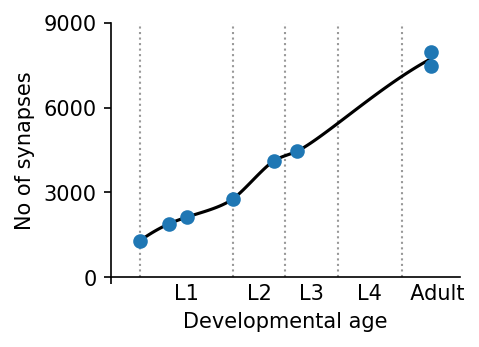

In [7]:
no_of_synapses = []
for dataset_number in range(1, 9):    
    no_of_synapses.append(sum(data[dataset_number].sum()))
plot_graph(no_of_synapses, [0,3000,6000,9000], 'No of synapses')

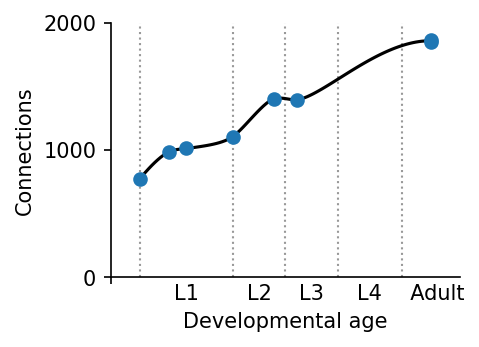

In [8]:
connection_data_postemb_remove = remove_postemb(connection_data)
connections = list(connection_data_postemb_remove.astype(bool).sum())
plot_graph(connections, [0,1000,2000], 'Connections')

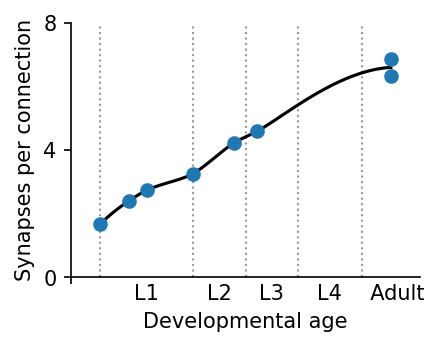

In [9]:
connection_data_postemb_remove = remove_postemb(connection_data)
connection_from_birth =  connection_data_postemb_remove[connection_data_postemb_remove['Dataset1'] > 0]
synapses_per_connection = list(connection_from_birth.apply(lambda s: s[s > 0].mean()))

plot_graph(synapses_per_connection, [0,4,8], 'Synapses per connection')

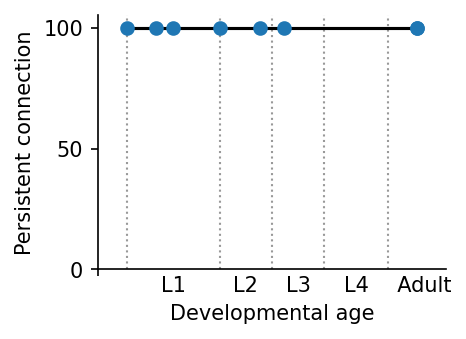

In [10]:
persistant_contact = []
persistant_contact.append(100)
for dataset_number in range(2, 9):    
  persistant_contact.append(np.sum(data[dataset_number][data[dataset_number-1]>0].count().values)*100/np.sum(data[dataset_number-1][data[dataset_number-1]>0].count().values))
plot_graph(persistant_contact, [0,50,100], 'Persistent connection', smooth_line=False)

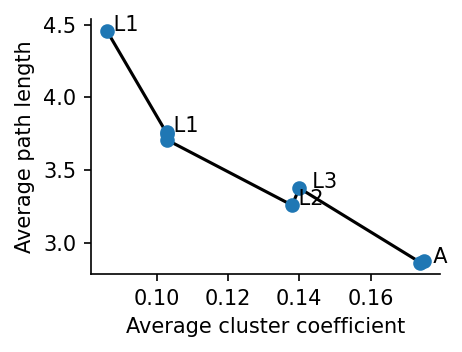

In [11]:
cytoscape_cluster_coeff =       [0.086,0.103,0.103,0.103,0.138,0.140,0.174,0.175]
cytoscape_average_path_length = [4.457,3.744,3.762,3.705,3.257,3.375,2.863,2.873]


fig, ax = plt.subplots(figsize=(3, 3*0.75), dpi=150)
ax.scatter(cytoscape_cluster_coeff, cytoscape_average_path_length, zorder=2)
ax.plot(cytoscape_cluster_coeff, cytoscape_average_path_length, zorder=1, color='black')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)  

for i, txt in enumerate([' L1', '', ' L1', '', ' L2', '  L3', '  A', '']):
    ax.annotate(txt, (cytoscape_cluster_coeff[i], cytoscape_average_path_length[i]), fontsize=10)
    
plt.ylabel('Average path length')
plt.xlabel('Average cluster coefficient')
    
plt.show()

In [7]:
def remove_noise(df):
    df = df.copy()
    noise_edges = []
    for pre, post in df.index:
        edge = pre, post
        edge_c = (contralateral(pre), contralateral(post))
        syns = df.loc[edge]
        if edge != edge_c and edge_c in df.index:
            syns_c = df.loc[edge_c]
        else:
            syns_c = np.zeros(df.shape[1])

        if (syns >= 2).sum() >= 2:
            continue
        if any((syns >= 1) & (syns_c >= 2)):
            continue
        if any((syns >= 2) & (syns_c >= 1)):
            continue

        noise_edges.append(edge)

    return df.drop(noise_edges)


def to_npair(df):
    df = df.copy()
    index_names = df.index.names
    temp_index_names = []
    for i, idx_name in enumerate(df.index.names):
        temp_index_name = idx_name + '_pair'
        temp_index_names.append(temp_index_name)
        df[temp_index_name] = df.index.get_level_values(i).map(npair)

    df_pair = df.groupby(temp_index_names).sum()
    df_pair.index.names = index_names
    return df_pair


def classify_edges(connection_data, datasets=all_datasets, edge_type='count'):
    G_postemb = connection_data.copy()
    G_postemb = G_postemb[(G_postemb.sum(axis=1) > 0)]
    G = remove_postemb(G_postemb)
    G_normalized = G / G.sum() * G.sum().mean()
    G_filtered = remove_noise(G)

    G_pair = to_npair(G)
    G_pair_normalized = to_npair(G_normalized)
    G_pair_filtered = to_npair(G_filtered)
    pair_edges_filtered = G_pair_filtered[G_pair_filtered.sum(axis=1) > 0].index
    pair_edges_all = G_pair[G_pair.sum(axis=1) > 0].index

    timepoints = [timepoint[d] for d in datasets]
    p_values = []
    for edge in pair_edges_filtered:
        synapses = G_normalized[G_normalized.index.map(lambda e: (npair(e[0]), npair(e[1])) == edge)]
        x = timepoints * synapses.shape[0]
        p_values.append(sc.stats.spearmanr(x, synapses.values.flatten()).pvalue)

    fdr = fdrcorrection0(p_values)
    significant_edges = list(compress(pair_edges_filtered, fdr[0]))

    classification = {
        'increase': [],
        'decrease': [],
    }
    for edge in significant_edges:
        syns_normalized = G_pair_normalized.loc[edge]
        juv = np.mean(syns_normalized[:2])
        mat = np.mean(syns_normalized[[d for d in datasets if stage[d] == 'Adult']])
        if mat > juv*5:
            classification['increase'].append(edge)
        elif juv > mat*5:
            classification['decrease'].append(edge)

    classification['stable'] = []
    for edge in G_pair_filtered.index:
        if edge in classification['increase'] or edge in classification['decrease']:
            continue
        if np.count_nonzero(G_pair.loc[edge]) >= len(datasets) - 1:
            classification['stable'].append(edge)


    classification['noise'] = [
        e for e in pair_edges_all if e not in pair_edges_filtered
    ]
    classification['remainder'] = [
        e for e in pair_edges_all if e not in [h for hs in classification.values() for h in hs]
    ]

    classifications = {}
    pair_classifications = {e: t for t in classification for e in classification[t]}
    for (pre, post) in G.index:
        classification = pair_classifications[npair(pre), npair(post)]
        if (pre, post) not in G_filtered.index:
            classification = 'noise'
        classifications[(pre, post)] = classification

    edge_classifications = pd.Series(classifications, name='edge_classifications')
    edge_classifications.index.set_names(['pre', 'post'], inplace=True)

    G_classifications = G.merge(edge_classifications, left_index=True, right_index=True)
    counts = G_classifications.groupby('edge_classifications').agg(lambda s: s.astype(bool).sum())
    counts.loc['all'] = counts.sum()
    return edge_classifications

In [42]:
def plot_stack_area(df, yticks, y_name, size=3):
    fig, ax = plt.subplots(figsize=(size, size*0.75), dpi=150)
    df = df.copy()
    df.loc['Stable']+=df.loc['Developmental change']
    df.loc['Variable']+=df.loc['Stable']

    colors = {
            'Variable': '#eeeeee', 
            'Stable': '#aaaaaa',
            'Developmental change': '#6DB6FF',
            'Variable edge': '#aaaaaa', 
            'Stable edge': '#4C4D4C',
            'Developmental change edge': '#006DDB'
        }
        
    x_ticks = list(timepoint.values())     
    z_order = 1
    for neuron_type in ['Variable', 'Stable', 'Developmental change']:
      ax.plot(x_ticks, df.loc[neuron_type], zorder=z_order, color=colors[neuron_type+" edge"])
      ax.fill_between(x_ticks, df.loc[neuron_type], [0]*8, alpha=1, zorder=z_order, color=colors[neuron_type])
      ax.scatter(x_ticks, df.loc[neuron_type], zorder=z_order, color=colors[neuron_type+" edge"])
      z_order+=1

    min_x = 0
    max_x = 50
    ax.set_xlim([min_x-5, max_x+5])
    ax.set_xticks([min_x-5])
    ax.tick_params(axis='x', labelbottom=False)
    ax.set_xticks(larval_stage_mids, minor=True)
    ax.set_xticklabels(larval_stage_labels, minor=True)
    ax.tick_params(axis='x', which='minor', bottom=False, pad=1)

    for t in larval_stage_ends:
        plt.axvline(t, color='#999999', linestyle='dotted', linewidth=1, zorder=-1)

    ax.set_yticks(yticks)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)    

    plt.ylabel(y_name)
    plt.xlabel('Developmental age')
    plt.show()

In [8]:
connection_data_postemb_remove = remove_postemb(connection_data)
edge_classifications = classify_edges(connection_data_postemb_remove)
G_classifications = connection_data_postemb_remove.merge(edge_classifications.map(categories), left_index=True, right_index=True)
connections_count = G_classifications.groupby('edge_classifications').agg(lambda s: s.astype(bool).sum())
synapse_count = G_classifications.groupby('edge_classifications').sum()

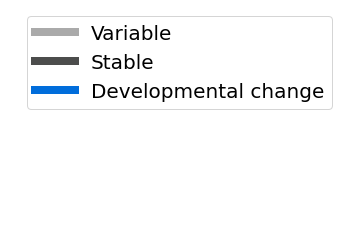

In [63]:
colors = {
    'Variable': '#eeeeee', 
    'Stable': '#aaaaaa',
    'Developmental change': '#6DB6FF',
    'Variable edge': '#aaaaaa', 
    'Stable edge': '#4C4D4C',
    'Developmental change edge': '#006DDB'
}
# Create legend handles manually
line1, = plt.plot([1], label='Variable', color=colors['Variable edge'], linewidth=8)
line2, = plt.plot([1], label='Stable', color=colors['Stable edge'], linewidth=8)
line3, = plt.plot([1], label='Developmental change', color=colors['Developmental change edge'], linewidth=8)
plt.legend(handles=[line1, line2, line3], prop={'size': 20})
plt.gca().set_axis_off()
plt.show()

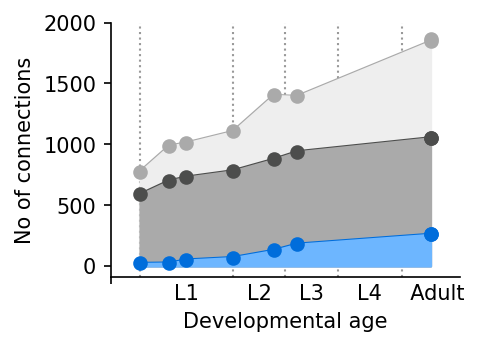

In [64]:
plot_stack_area(connections_count, range(0, 2500, 500), 'No of connections')

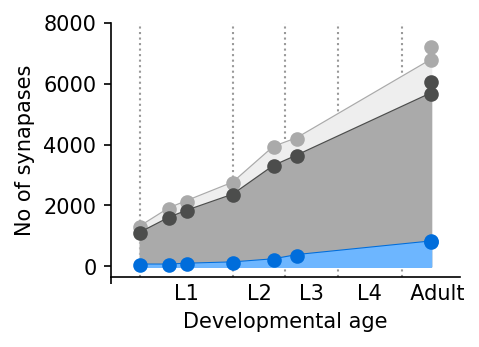

In [43]:
plot_stack_area(synapse_count, range(0, 8500, 2000), 'No of synapases')

In [11]:
def plot_degree_distribution(degrees, max_degree, xfreg=1):
    c = Counter(degrees)
    d = [0 for i in range(max_degree+1)]
    
    for i in range(max_degree+1): 
        d[i] = c[i]
        
    plt.plot(range(max_degree+1), d)
    plt.bar( range(max_degree+1), d)
    plt.xticks(range(0, max_degree+1, xfreg))
    plt.gca().set(title='Degree distribution', ylabel='Frequency', xlabel="Degree")
    plt.show()
    return

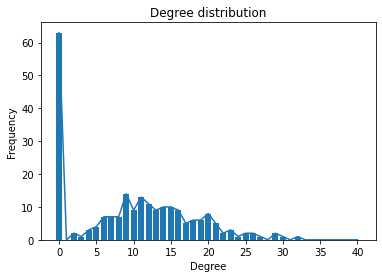

In [13]:
plot_degree_distribution(dict(nx_G[8].out_degree()).values(),40, 5)

# Extra

In [136]:
neuron_type = connection_data.copy()
for n_from, n_to in connection_data.index:
    for dataset in all_datasets:
        if neuron_type.loc[(n_from, n_to), dataset]>0:
            neuron_type.loc[(n_from, n_to), dataset] = ntype(n_to)
        else:
            neuron_type.loc[(n_from, n_to), dataset] = "other"
            
stacked_data = pd.DataFrame()
for dataset in all_datasets:
    stacked_data[dataset]=neuron_type[dataset].value_counts().drop(['other','muscle','modulatory'])
    stacked_data[dataset] = stacked_data[dataset]/stacked_data[dataset].sum()

In [137]:
for dataset in stage.values():
    stacked_data[dataset] = 0
for dataset in stage:
    stacked_data[stage[dataset]] += stacked_data[dataset]
for dataset in stage.values():
    stacked_data[dataset] = stacked_data[dataset]/stacked_data[dataset].sum()
stacked_data['L4'] = 0

In [138]:
stacked_data

,Dataset1,Dataset2,Dataset3,Dataset4,Dataset5,Dataset6,Dataset7,Dataset8,L1,L2,L3,Adult,L4
inter,0.511513,0.474293,0.484433,0.478166,0.460438,0.471586,0.437165,0.436754,0.487101,0.460438,0.471586,0.436960,0
motor,0.271382,0.303342,0.288917,0.282751,0.291246,0.308736,0.309113,0.307876,0.286598,0.291246,0.308736,0.308494,0
sensory,0.217105,0.222365,0.226650,0.239083,0.248316,0.219678,0.253722,0.255370,0.226301,0.248316,0.219678,0.254546,0


In [117]:
stacked_data[['L1','L2','L3','L4','Adult']].T

,inter,motor,sensory
L1,0.487101,0.286598,0.226301
L2,0.460438,0.291246,0.248316
L3,0.471586,0.308736,0.219678
L4,0.000000,0.000000,0.000000
Adult,0.436960,0.308494,0.254546


<AxesSubplot:>

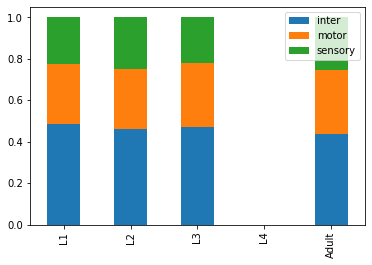

In [116]:
ax = stacked_data[['L1','L2','L3','L4','Adult']].T.plot(kind='bar', stacked=True)

In [109]:
x_ticks = list(timepoint.values())     
for type in ['motor','sensory','inter']:
    y=stacked_data.loc[type][['L1','L2','L3','L4','Adult']]
    plt.bar(

L1       0.286598
L2       0.291246
L3       0.308736
L4       0.000000
Adult    0.308494
Name: motor, dtype: float64

In [126]:
stacked_data*100

,Dataset1,Dataset2,Dataset3,Dataset4,Dataset5,Dataset6,Dataset7,Dataset8,L1,L2,L3,Adult,L4
inter,51.151316,47.429306,48.443337,47.816594,46.043771,47.158609,43.716498,43.675418,48.710138,46.043771,47.158609,43.695958,0
motor,27.138158,30.334190,28.891656,28.275109,29.124579,30.873622,30.911257,30.787589,28.659778,29.124579,30.873622,30.849423,0
sensory,21.710526,22.236504,22.665006,23.908297,24.831650,21.967769,25.372245,25.536993,22.630083,24.831650,21.967769,25.454619,0


         Dataset1  Dataset2  Dataset3  Dataset4  Dataset5  Dataset6  Dataset7  \
inter    0.511513  0.474293  0.484433  0.478166  0.460438  0.471586  0.437165   
motor    0.271382  0.303342  0.288917  0.282751  0.291246  0.308736  0.309113   
sensory  0.217105  0.222365  0.226650  0.239083  0.248316  0.219678  0.253722   

         Dataset8         L1         L2         L3      Adult  L4  
inter    0.436754  48.710138  46.043771  47.158609  43.695958   0  
motor    0.307876  28.659778  29.124579  30.873622  30.849423   0  
sensory  0.255370  22.630083  24.831650  21.967769  25.454619   0  


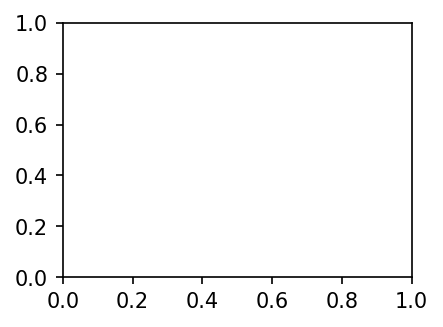

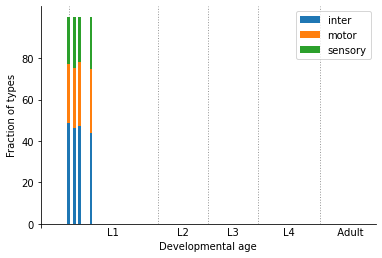

In [128]:
stacked_bar_plot(neuron_type, list(range(0,100,20)), 'Fraction of types')

In [144]:
stacked_data[['L1','L2','L3','L4','Adult']].T['motor']

L1       0.286598
L2       0.291246
L3       0.308736
L4       0.000000
Adult    0.308494
Name: motor, dtype: float64

In [155]:
def stacked_bar_plot(df, yticks, y_name, typeofgraph = 'connection_type', size=3):
    fig, ax = plt.subplots(figsize=(size, size*0.75), dpi=150)
       
    x_ticks = larval_stage_mids

    stacked_data = pd.DataFrame()
    for dataset in all_datasets:
        stacked_data[dataset] = df[dataset].value_counts().drop(['other','muscle','modulatory'])
        stacked_data[dataset] = stacked_data[dataset]/stacked_data[dataset].sum()

    for dataset in stage.values():
        stacked_data[dataset] = 0
    for dataset in stage:
        stacked_data[stage[dataset]] += stacked_data[dataset]
    for dataset in stage.values():
        stacked_data[dataset] = stacked_data[dataset]*100/stacked_data[dataset].sum()
    stacked_data['L4'] = 0

    stacked_data = stacked_data[['L1','L2','L3','L4','Adult']].T

    if typeofgraph == 'connection_type':
        ax.bar(x_ticks, stacked_data['motor'], width=3)
        ax.bar(x_ticks, stacked_data['sensory'], bottom=stacked_data['motor'], width=3)
        ax.bar(x_ticks, stacked_data['inter'], bottom=stacked_data['motor']+stacked_data['sensory'], width=3)
    
    min_x = 0
    max_x = 50

    ax.set_xlim([min_x-5, max_x+5])
    ax.set_xticks([min_x-5])
    ax.tick_params(axis='x', labelbottom=False)
    ax.set_xticks(larval_stage_mids, minor=True)
    ax.set_xticklabels(larval_stage_labels, minor=True)
    ax.tick_params(axis='x', which='minor', bottom=False, pad=1)
    
    for t in larval_stage_ends:
        plt.axvline(t, color='#999999', linestyle='dotted', linewidth=1, zorder=-1)
    
    ax.set_yticks(yticks)
    ax.legend()
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)    
    
    plt.ylabel(y_name)
    plt.xlabel('Developmental age')
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


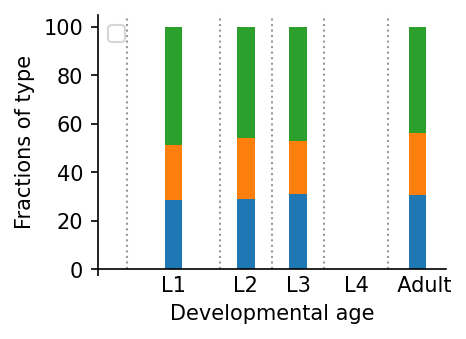

In [157]:
stacked_bar_plot(neuron_type, list(range(0,120,20)), 'Fractions of type (%)','connection_type')